In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set(context='talk', style='darkgrid', palette='colorblind')

In [2]:
from sys import path
path.append('..')
from convexcontrol.main import Controller, ControllerR2
from convexcontrol.resources import PVSys, Battery, TCL, PVSysR2, BatteryR2, DiscreteR2, Generator

In [3]:
agg_point = np.zeros(200)
agg_point[:40] = np.linspace(-40, 40, 40)
agg_point[40:60] = np.linspace(40, 0, 20)
agg_point[100:125] = 20.
agg_point[125:130] = 25.
agg_point[130:135] = 30.
agg_point[135:140] = 35.
agg_point[140:145] = 30.
agg_point[145:150] = 25.
agg_point[150:175] = -25.
agg_point[175:200] = -50.

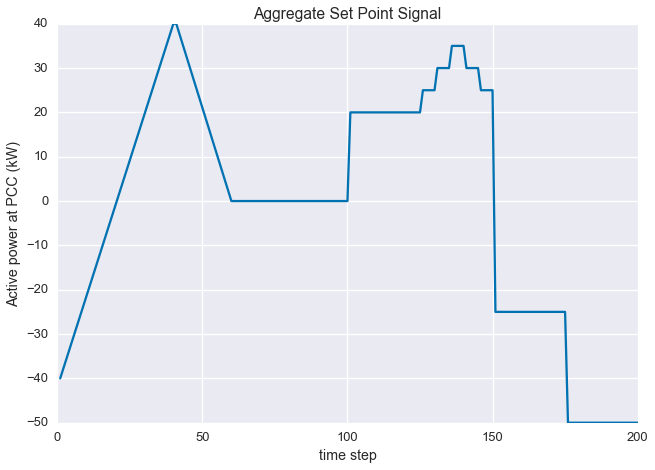

In [4]:
plt.plot(figsize=(14, 8))
plt.plot(range(1, 201), agg_point)
plt.xlabel('time step')
plt.ylabel('Active power at PCC (kW)')
plt.title('Aggregate Set Point Signal')

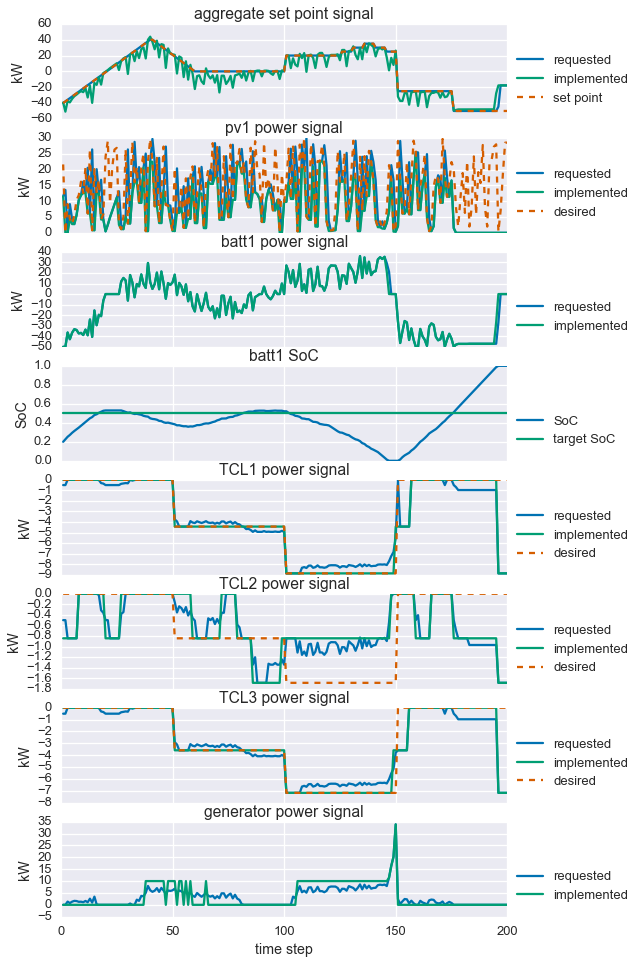

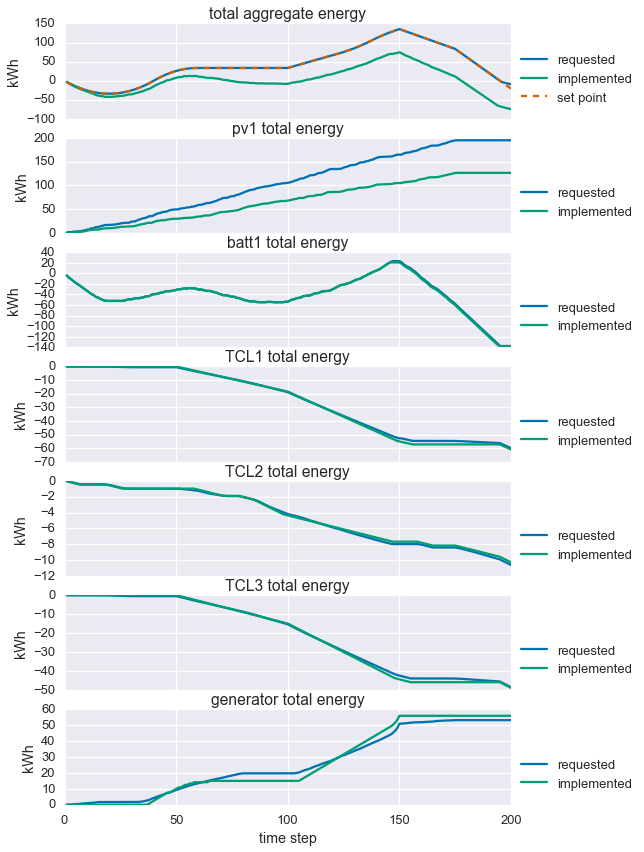

In [5]:
np.random.seed(1)
controller = Controller(mu=1e3)
controller.addResource(PVSys('pv1', T=201))
controller.addResource(Battery('batt1', Cb=1e-1))
for i in xrange(3):
    controller.addResource(TCL('TCL{}'.format(i+1), Chvac=1e1, pmax=np.random.uniform(-20, 0)))
controller.addResource(Generator('generator', pmin=10, pmax=60))
controller.runSimulation(agg_point, error_diffusion=False, solver='MOSEK')
_ = controller.plotReqImpPower()
_ = controller.plotReqImpTotalEnergy()

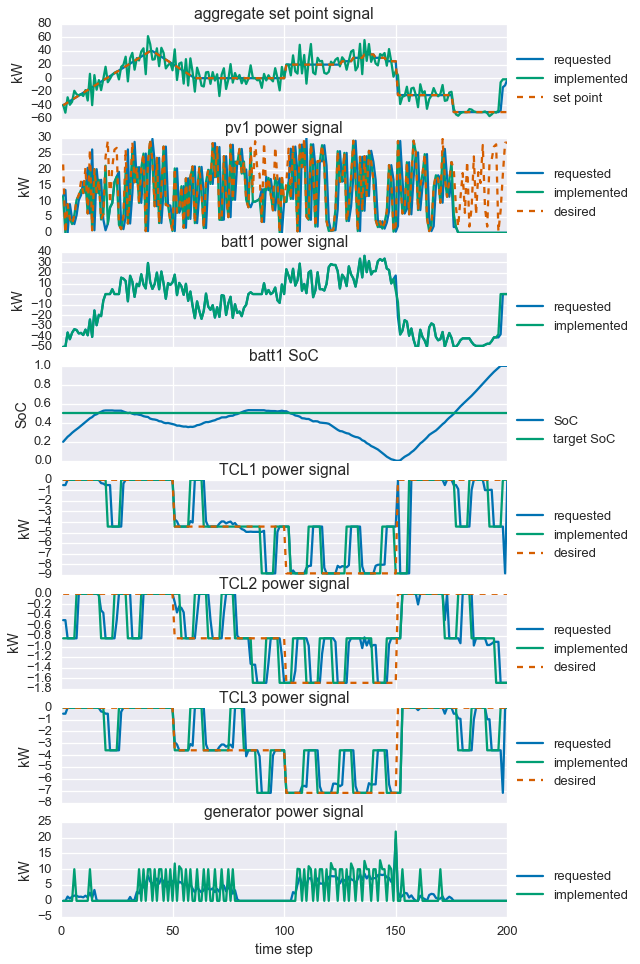

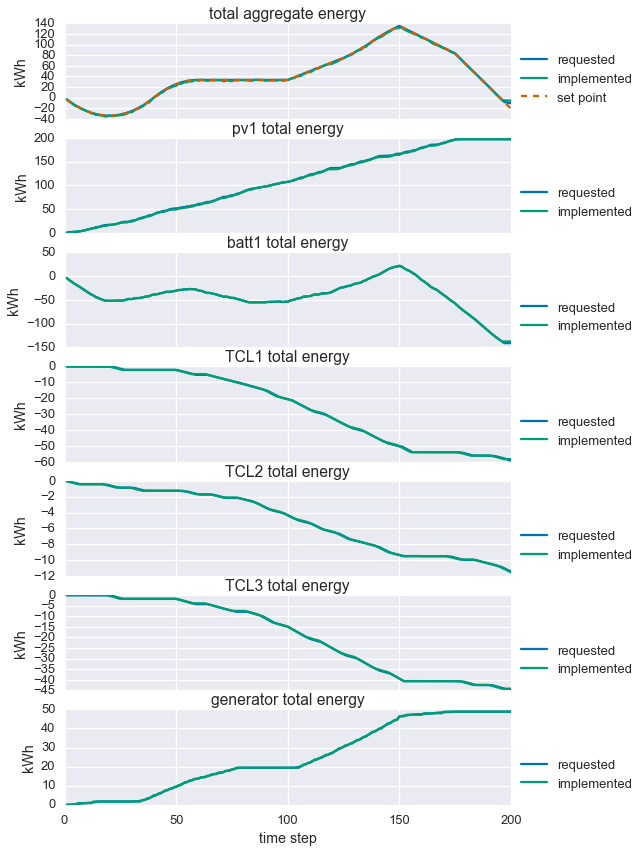

In [6]:
np.random.seed(1)
controller = Controller(mu=1e3)
controller.addResource(PVSys('pv1', T=201))
controller.addResource(Battery('batt1', Cb=1e-1))
for i in xrange(3):
    controller.addResource(TCL('TCL{}'.format(i+1), Chvac=1e1, pmax=np.random.uniform(-20, 0)))
controller.addResource(Generator('generator', pmin=10, pmax=60))
controller.runSimulation(agg_point, error_diffusion=True, solver='MOSEK')
_ = controller.plotReqImpPower()
_ = controller.plotReqImpTotalEnergy()